In [127]:
import numpy as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [128]:
data = pd.read_csv(r'datasets/HeathAttackPrediction/heart.csv')

In [129]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [130]:
# categoricos
cat = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
#numerico
num = ['age','trtbps','chol','thalachh','oldpeak','output']

In [131]:
data.isna().nunique()

age         1
sex         1
cp          1
trtbps      1
chol        1
fbs         1
restecg     1
thalachh    1
exng        1
oldpeak     1
slp         1
caa         1
thall       1
output      1
dtype: int64

In [132]:
data.isnull().nunique()

age         1
sex         1
cp          1
trtbps      1
chol        1
fbs         1
restecg     1
thalachh    1
exng        1
oldpeak     1
slp         1
caa         1
thall       1
output      1
dtype: int64

In [133]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [135]:
data.nunique()[ (data.nunique()>2) & (data.nunique()<5)].index

Index(['cp', 'restecg', 'slp', 'thall'], dtype='object')

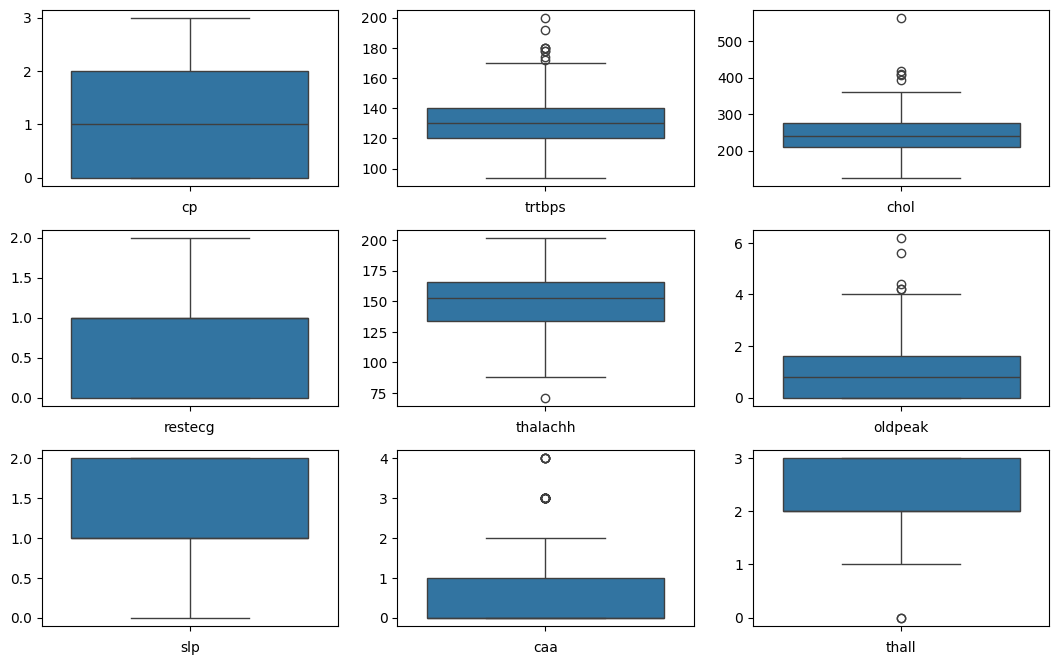

In [136]:
types   = data.nunique().reset_index()
columns = types.loc[types[types.columns[1]]>2]['index']

fig , ax = plt.subplots(3,3,figsize=(13,8))
fig.subplots_adjust(hspace=0.25)
for coluns , axis in  zip(columns.values[1:],ax.flatten()):
    sea.boxplot(data[coluns],ax=axis)
    axis.set_xlabel(coluns)
    axis.set_ylabel('')
plt.show()

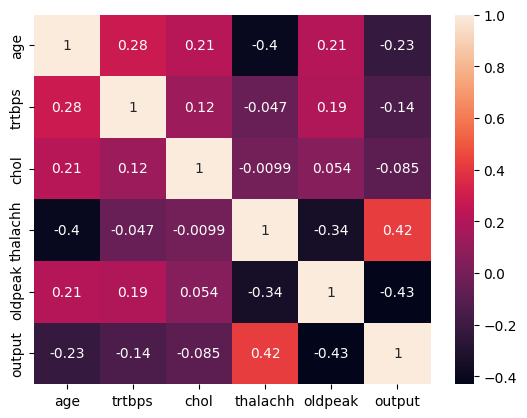

In [137]:
sea.heatmap(data[num].corr(),annot=True)
plt.show()

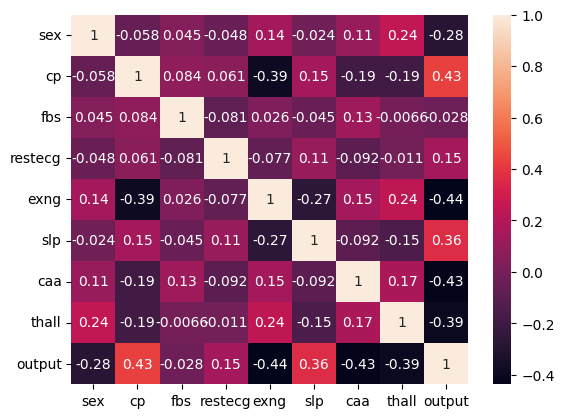

In [138]:
sea.heatmap(data[cat].corr('kendall'),annot=True)
plt.show()

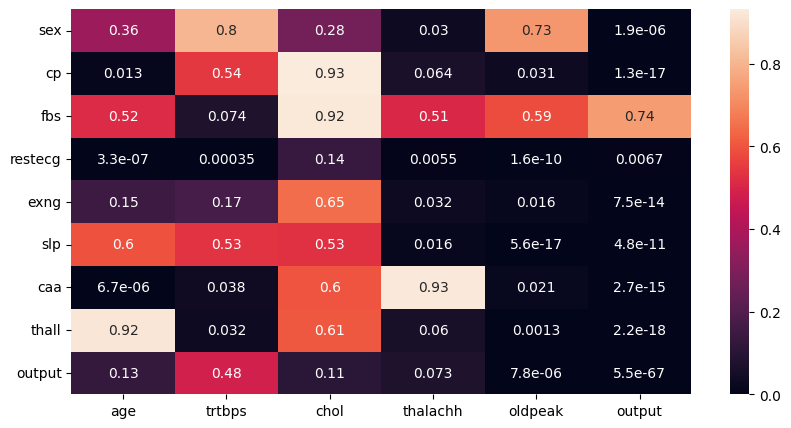

In [139]:
from scipy.stats import chi2_contingency
matrix = []
for i in cat:
    lista = []
    for j in num:    
        
        cross = pd.crosstab(data[i],data[j])
        chi , p ,_ ,_ = chi2_contingency(cross)
        lista.append(p)
  
    matrix.append(lista)
plt.figure(figsize=(10,5))
sea.heatmap(pd.DataFrame(data=matrix,columns=num,index=cat),annot=True)
plt.show()

### Preprocessamento

In [140]:
from sklearn.pipeline        import Pipeline
from sklearn.base            import BaseEstimator,TransformerMixin
from sklearn.preprocessing   import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model    import LogisticRegression,SGDClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC
from sklearn.ensemble        import VotingClassifier,RandomForestClassifier
from sklearn.metrics         import *

In [141]:
class Padronizacao(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):  
        if ( type(self.columns) == list ):
            X[self.columns]   = StandardScaler().fit_transform(X[self.columns])
        else:
            X[[self.columns]] = StandardScaler().fit_transform(X[[self.columns]])
        return X
    
class Dummies(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):
        return pd.get_dummies(X,columns=self.columns,dtype=int)

In [142]:
pipeline = Pipeline(
    steps=[
        ('Dummies'     ,Dummies(cat[:len(cat)-1])),
        ('Padronizacao',Padronizacao(num[:len(num)-1]))
    ]
)
dataset = pipeline.fit_transform(data)

In [143]:
X = dataset.drop(columns=['output'],axis=0)
y = dataset['output']

In [144]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=42,train_size=0.2)

In [145]:
dataset

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


### Logistic Regression

In [165]:
params = dict(
    l1_ratio = np.around(np.linspace(0.1,0.9,15),3),
    max_iter = [500,600,700,800]
)
gridLog = GridSearchCV(estimator=LogisticRegression(penalty='elasticnet',solver='saga'),param_grid=params,scoring='accuracy')
gridLog.fit(xtrain,ytrain)
print(gridLog.best_estimator_)
print(gridLog.best_score_)

LogisticRegression(l1_ratio=0.329, max_iter=500, penalty='elasticnet',
                   solver='saga')
0.8333333333333333


In [166]:
logistic = gridLog.best_estimator_
logistic.fit(xtrain,ytrain)

LogisticRegression(l1_ratio=0.329, max_iter=500, penalty='elasticnet',
                   solver='saga')

In [167]:
predLog = logistic.predict(xtest)

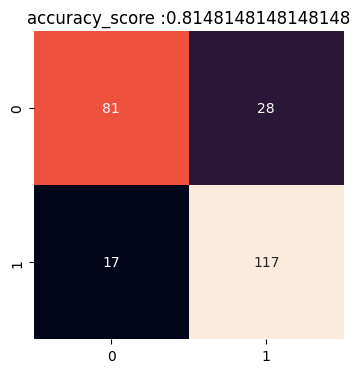

In [168]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predLog), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predLog)}')
plt.show()